/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 0 0]
[[115  37]
 [ 33  46]]
Accuracy: 69.7


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


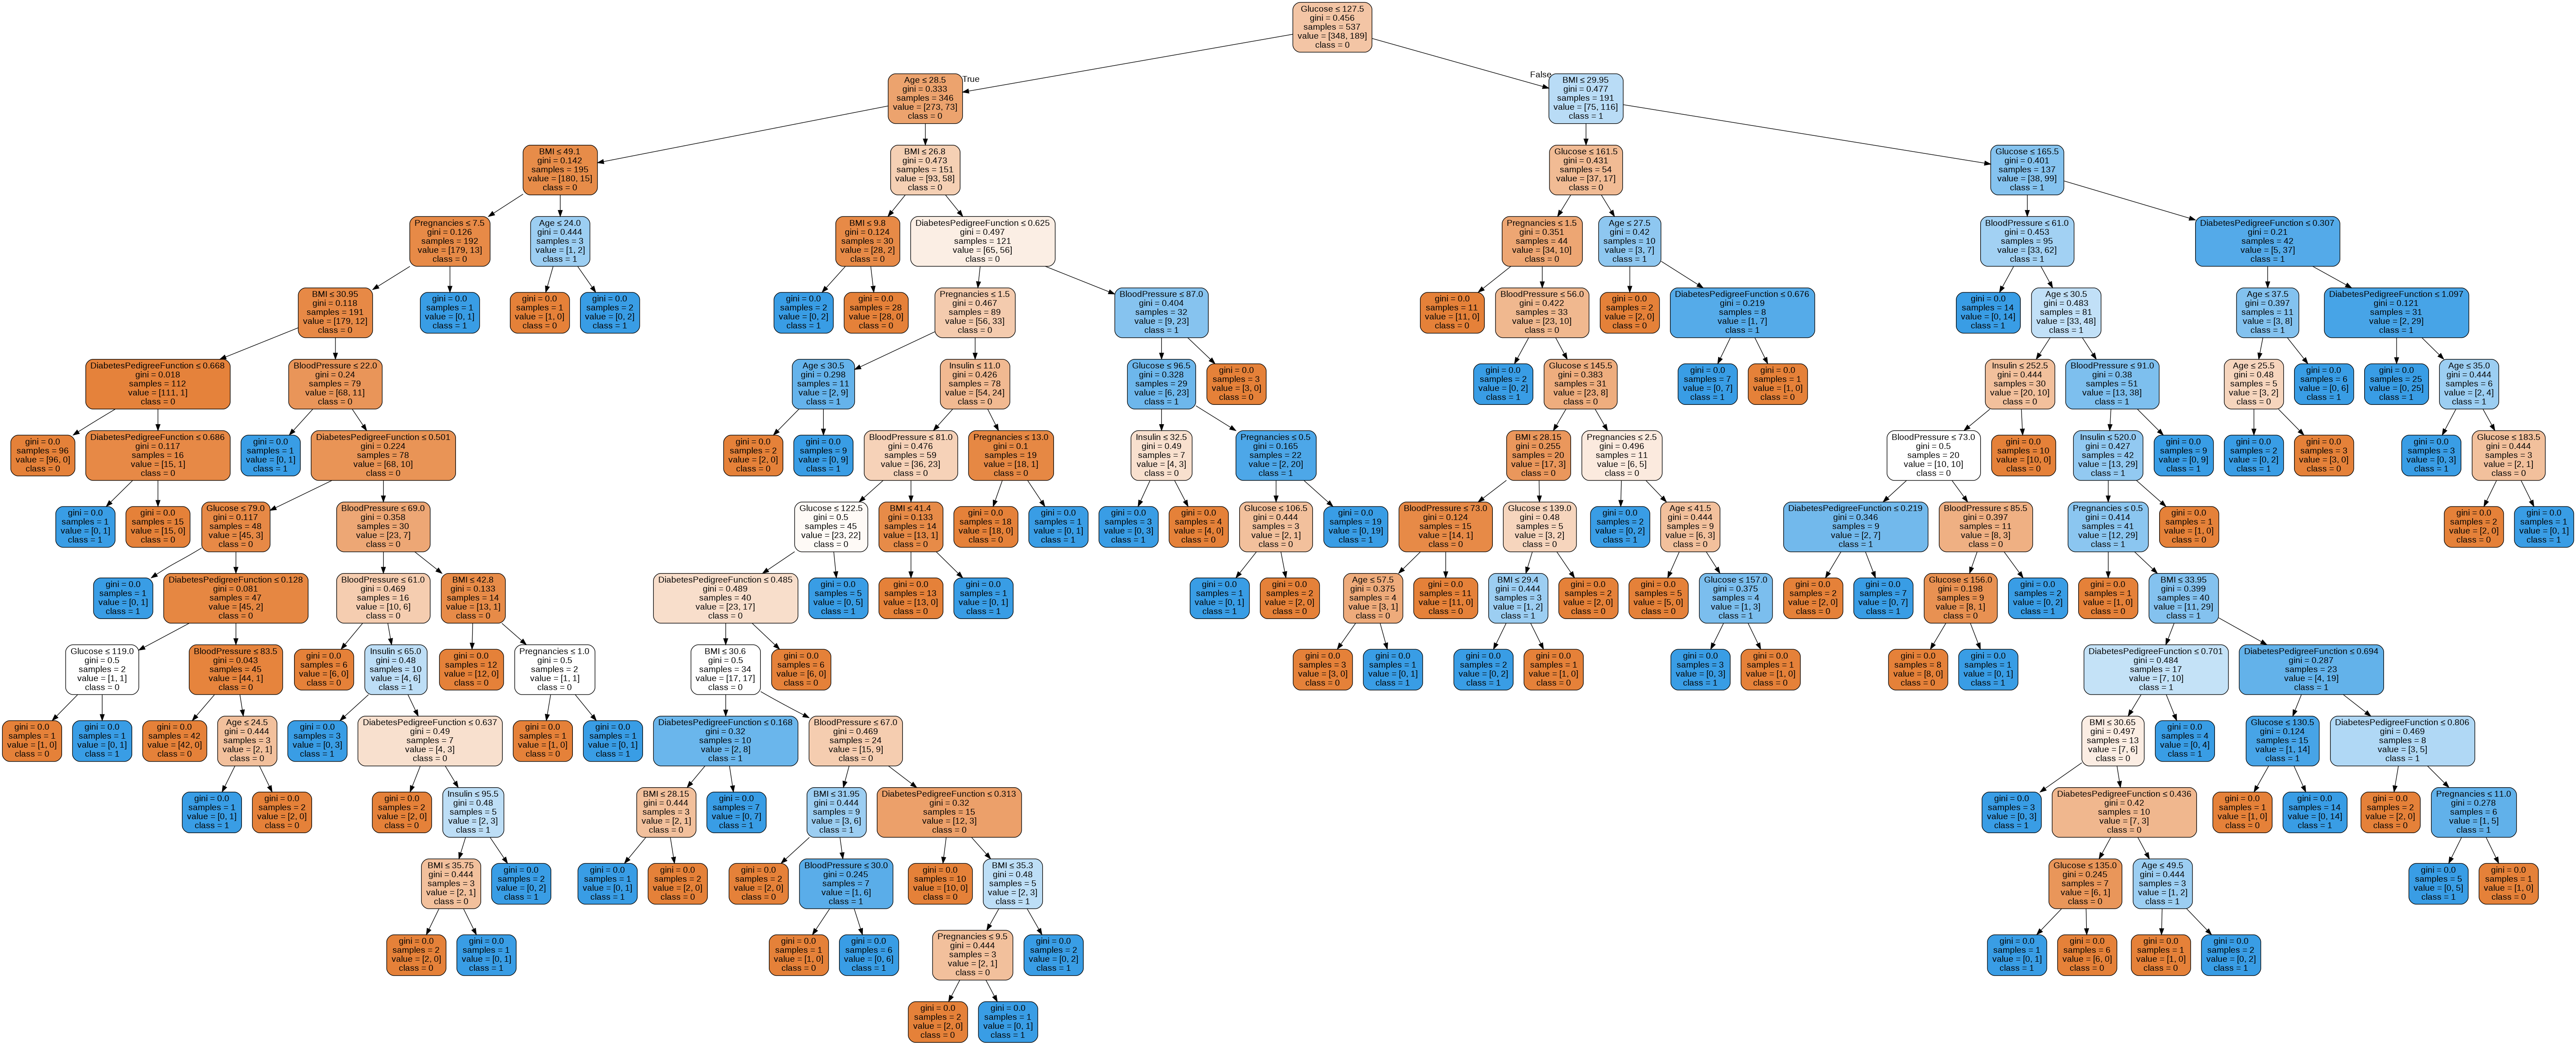

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

pima =  pd.read_csv("ex3.csv")
pima.head()

import seaborn as sns
corr = pima.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = pima[feature_cols]
y = pima.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=4)

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

print("Accuracy:", round(metrics.accuracy_score(Y_test,y_pred)*100,2))

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ex3.png')
Image(graph.create_png())